# Linear Antenna Array Analysis

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style('darkgrid')

In [2]:
frequency = 24e9
wavelength = 3e8 / frequency
k = 2 * np.pi / wavelength
theta = np.arange(-180, 180, 0.05)

## Parameters

```array_size```: size of the linear array

```array_spacing```: space between antenna elements (meter)

```steer_angle```: angle of the main beam (degree)

In [3]:
array_size = 64
array_spacing = 0.5 * wavelength
steer_angle = 40

array_geometry = np.arange(0, array_spacing * array_size, array_spacing)
weight = np.exp(-1j * k * array_geometry * np.sin(
    steer_angle / 180 * np.pi)) * signal.chebwin(
        array_size, at=45)

theta_grid, array_geometry_grid = np.meshgrid(theta, array_geometry)
A = np.exp(1j * k * array_geometry_grid * np.sin(theta_grid / 180 * np.pi))

AF = np.matmul(weight, A)

Text(0.5, 0, 'Array geometry (m)')

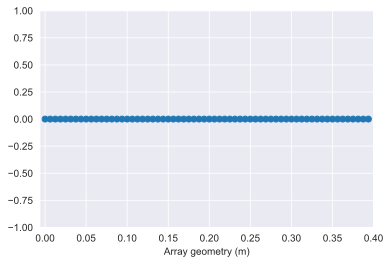

In [4]:
plt.scatter(array_geometry, np.zeros((1, array_size)))
plt.xlim([
    np.min(array_geometry) - array_spacing,
    np.max(array_geometry) + array_spacing
])
plt.ylim([-1, 1])
plt.xlabel('Array geometry (m)')

(-60, 0)

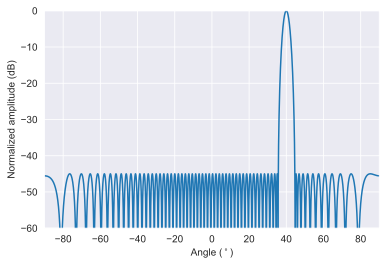

In [5]:
pattern_dB = 20 * np.log10(np.abs(AF))
pattern_dB = pattern_dB - np.max(pattern_dB)

plt.plot(theta, pattern_dB)
plt.xlabel(r'Angle ($^\circ$)')
plt.ylabel('Normalized amplitude (dB)')
plt.xlim([-90, 90])
plt.ylim([-60, 0])
# plt.savefig('pattern.svg')